In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set up display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

#Load the dataset
df = pd.read_csv("netflix_titles.csv")

#Preview the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#overview of the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nBasic Info:")
df.info()

print("\nMissing values per column:\n")
print(df.isnull().sum())

Dataset Shape: (8807, 12)

Columns:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:

show_id            0
type        

In [3]:
#Clean and prepare the data 

#Make a copy
netflix = df.copy()

#Convert 'date_added' to datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

#Fill missing countries and directors with 'Unknown'
netflix['country'].fillna('Unknown', inplace=True)
netflix['director'].fillna('Unknown', inplace=True)

#Fill missing ratings with 'Not Rated'
netflix['rating'].fillna('Not Rated', inplace=True)

#Trim spaces from text columns for a cleaner look
for col in ['type', 'title', 'country', 'rating', 'listed_in']:
    netflix[col] = netflix[col].str.strip()

#Display the first few cleaned rows
netflix.head(3)

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
#Clean and prepare the data

#Make a copy
netflix = df.copy()

#Clean and convert 'date_added' to datetime format safely
netflix['date_added'] = netflix['date_added'].str.strip()  # remove spaces
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')  # safely convert

#Fill missing values with elegant defaults
netflix['country'].fillna('Unknown', inplace=True)
netflix['director'].fillna('Unknown', inplace=True)
netflix['rating'].fillna('Not Rated', inplace=True)

#Trim spaces from key text columns
for col in ['type', 'title', 'country', 'rating', 'listed_in']:
    netflix[col] = netflix[col].astype(str).str.strip()

#Preview the first few cleaned rows
netflix.head(3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3938109932.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['country'].fillna('Unknown', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3938109932.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3953992507.py:24: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3953992507.py:24: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


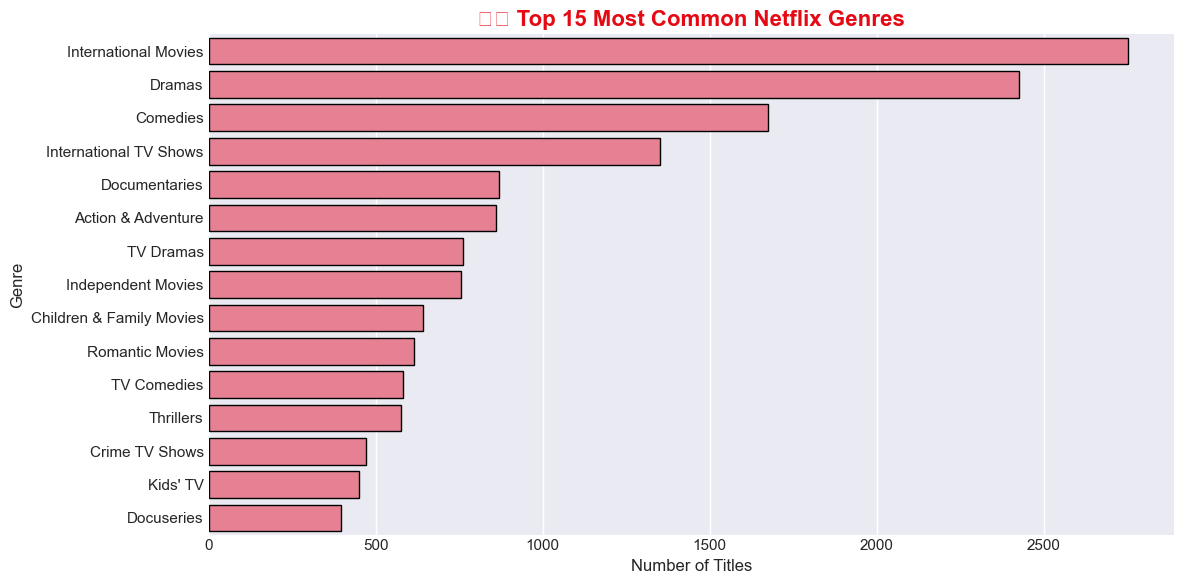

In [5]:
#Explore Genre Distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Split multiple genres
all_genres = netflix['listed_in'].str.split(', ')
genre_list = [genre for sublist in all_genres.dropna() for genre in sublist]

# Create a DataFrame for genre counts
genre_df = pd.DataFrame(genre_list, columns=['Genre'])
genre_counts = genre_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=genre_counts.head(15), x='Count', y='Genre', edgecolor='black')
plt.title("🎞️ Top 15 Most Common Netflix Genres", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3927459122.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


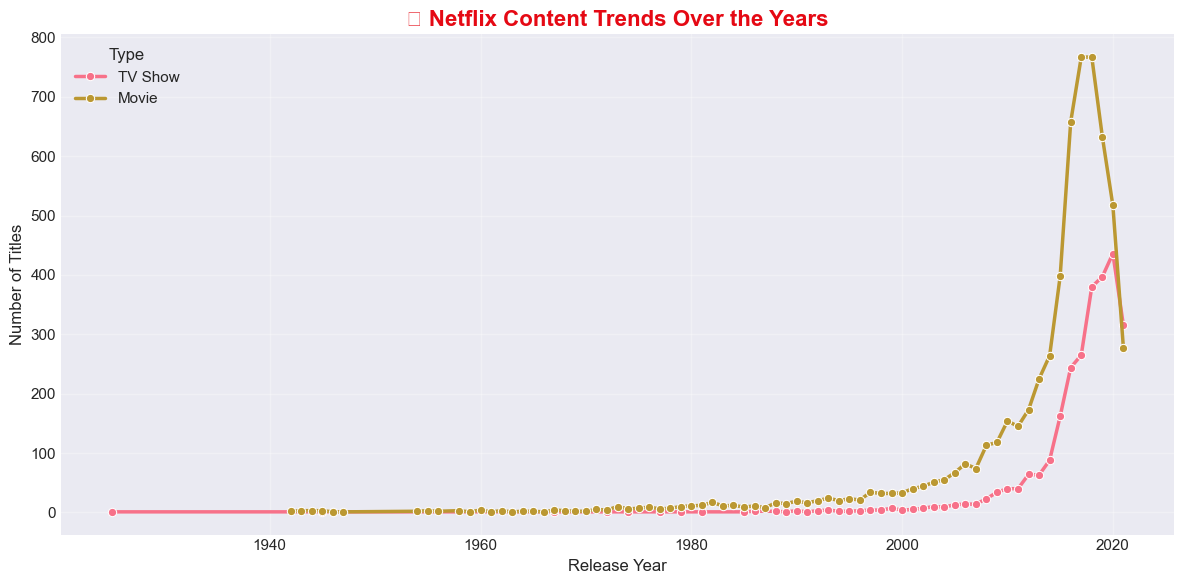

In [6]:
# Explore Content Trends Over Time 

# Count how many Movies vs TV Shows were released per year
content_trends = netflix.groupby(['release_year', 'type']).size().reset_index(name='Count')

# Sort by year for a smooth timeline
content_trends = content_trends.sort_values('release_year')

# Create a beautiful line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trends, x='release_year', y='Count', hue='type', linewidth=2.5, marker='o')

plt.title("📊 Netflix Content Trends Over the Years", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title='Type', loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3787402567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'] = movies['rating'].replace('Not Rated', None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3787402567.py:20: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


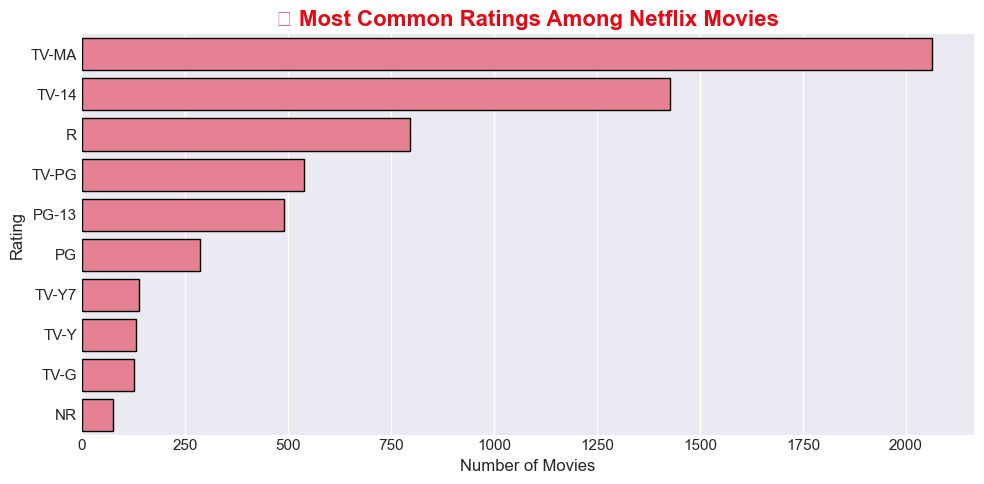

In [7]:
# Top Rated Movies 

# Filter only movies
movies = netflix[netflix['type'] == 'Movie']

# Extract release year and clean rating info
movies['rating'] = movies['rating'].replace('Not Rated', None)
top_rated = movies[movies['rating'].notnull()]

# Display the most common ratings
rating_counts = top_rated['rating'].value_counts().head(10).reset_index()
rating_counts.columns = ['Rating', 'Count']

# horizontal bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=rating_counts, x='Count', y='Rating', edgecolor='black')
plt.title("🏆 Most Common Ratings Among Netflix Movies", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.tight_layout()
plt.show()

## 🍿 Netflix Data Analysis Dashboard

#### A Classy Exploration of Genres, Content Trends & Ratings 🎬

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3878265659.py:15: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3878265659.py:15: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


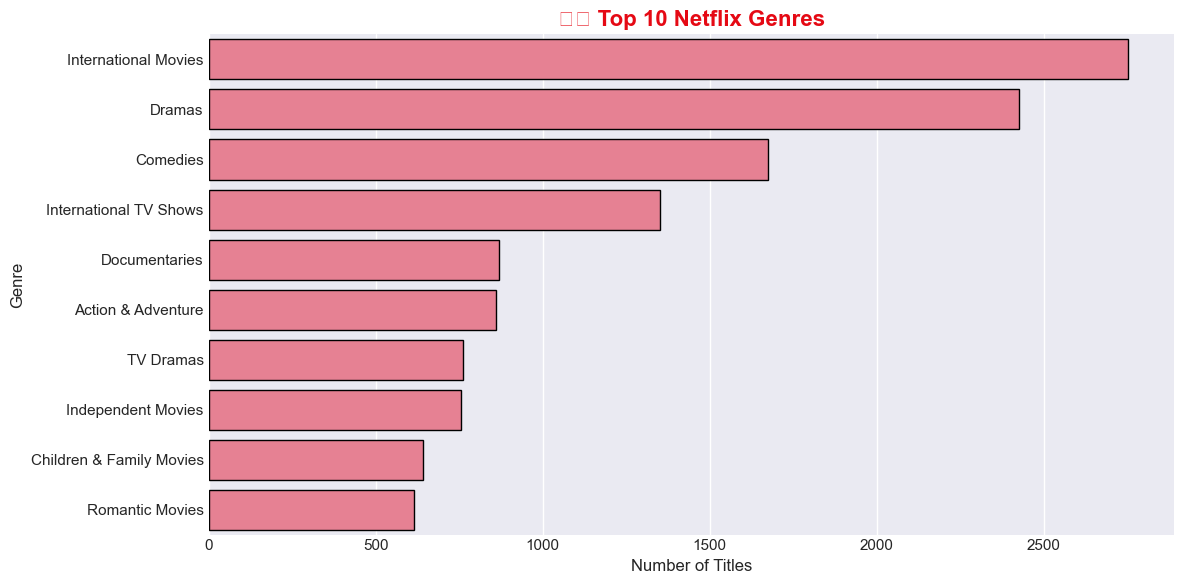

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3878265659.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


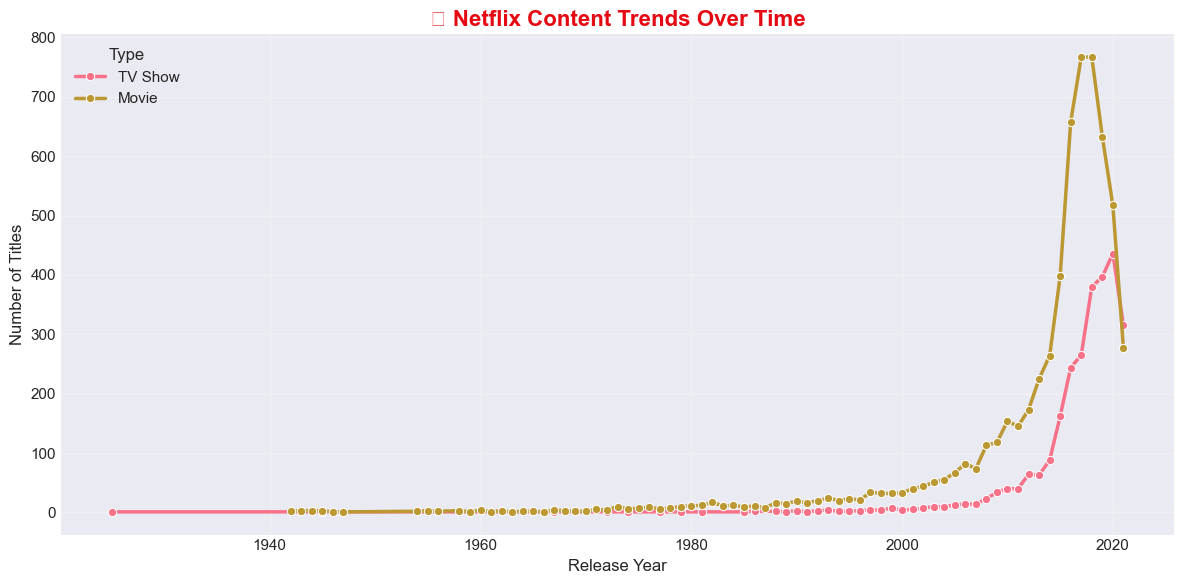

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\3878265659.py:35: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Administrator\netflix_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


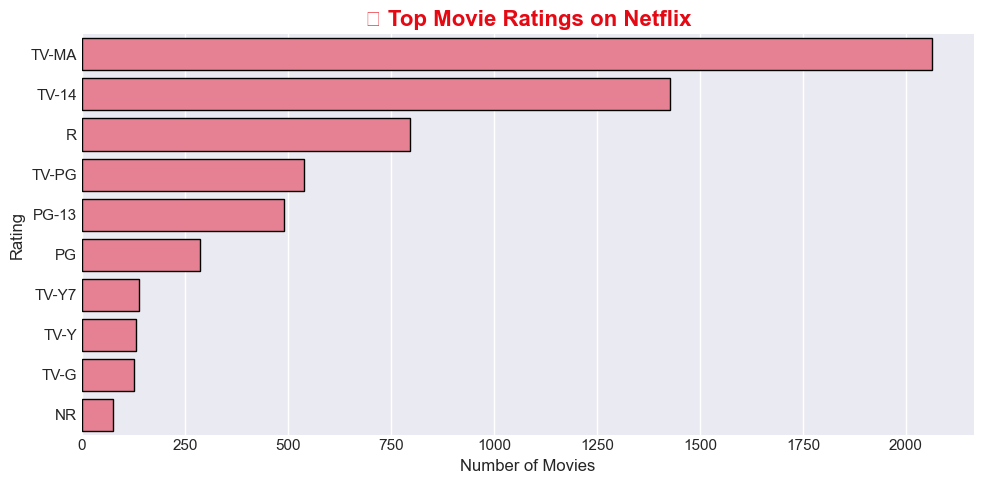

✨ **Insight Summary:**


- **Most common genres** reflect Netflix’s focus on dramas, comedies, and international content.
- **Movie releases surged after 2015**, showing Netflix’s rapid expansion and original production growth.
- **TV-MA and TV-14 dominate**, proving mature and teenage content lead the platform.


**Created by: Catherine Luchiri Andiwo — A Classy Data Storyteller 💫**

In [8]:
# Netflix Data Analysis Dashboard 

from IPython.display import Markdown, display

# title header
display(Markdown("## 🍿 Netflix Data Analysis Dashboard"))
display(Markdown("#### A Classy Exploration of Genres, Content Trends & Ratings 🎬"))

# Genre distribution
plt.figure(figsize=(12,6))
sns.barplot(data=genre_counts.head(10), x='Count', y='Genre', edgecolor='black')
plt.title("🎞️ Top 10 Netflix Genres", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()
plt.show()

# Content trends over years
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trends, x='release_year', y='Count', hue='type', linewidth=2.5, marker='o')
plt.title("📊 Netflix Content Trends Over Time", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title='Type', loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Ratings distribution
plt.figure(figsize=(10,5))
sns.barplot(data=rating_counts, x='Count', y='Rating', edgecolor='black')
plt.title("🏆 Top Movie Ratings on Netflix", fontsize=16, fontweight='bold', color='#E50914')
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.tight_layout()
plt.show()

display(Markdown("✨ **Insight Summary:**"))
display(Markdown("""
- **Most common genres** reflect Netflix’s focus on dramas, comedies, and international content.
- **Movie releases surged after 2015**, showing Netflix’s rapid expansion and original production growth.
- **TV-MA and TV-14 dominate**, proving mature and teenage content lead the platform.
"""))

display(Markdown("**Created by: Catherine Luchiri Andiwo — A Classy Data Storyteller 💫**"))